# LeNet 5

### From Paper
- http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

## LeNet-5 Architecture

![](./LeNet-5.png)

### Base Imports

In [349]:
import torch
from torch import nn, optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### Setting the device

In [15]:
available_device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{available_device} is available")
device = torch.device(device=available_device)
device

cuda is available


device(type='cuda')

### Let's Load the Dataset for MNIST

Note : 
    
 - The MNIST dataset consists of image of dimensions 1 * 28 * 28, but LeNet-5 takes 32*32,
so we need to pad the image by 2 in every side
    
 - Padding in pytorch https://pytorch.org/vision/0.8/transforms.html#torchvision.transforms.Pad

In [37]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Pad(2),
#                                 transforms.Resize((32,32))
                        ])

train_set = datasets.MNIST(root="../pytorch_dataset/", 
                          download=True,
                          transform=transform)

test_set = datasets.MNIST(root="../pytorch_dataset/", 
                          train=False,
                          download=True,
                          transform=transform)

## Creating the Dataloader

#### [Later Removed] Creating Collate class to remove the extra 1 channel in the input,
- I could done in the trainning loop but i wanted to learn to use collate_fn parameter of the Dataloader
class
- Note I didn't use collate because we need to passs 1 * 32 * 32 image

In [38]:
batch_size = 64

In [36]:
# class SequeezeChannel:
#     def __init__(self):
# #         self.dim = dim
#         pass
#     def __call__(self,batch):
#         images = [item[0].squeeze() for item in batch]
# #         print(images[0].shape)
#         images = torch.stack(images)
# #         print(images.shape)
#         labels = [item[1] for item in batch]
#         labels = torch.tensor(labels)

#         return images, labels
        

In [281]:
train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size,
                          pin_memory=True,)

# collate_fn=SequeezeChannel(),   
test_loader = DataLoader(test_set, shuffle=True, batch_size=batch_size,             
                         pin_memory=True,)
for x,y in train_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 1, 32, 32])
torch.Size([64])


## Looking into the loaders

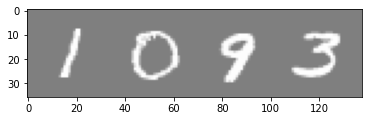

        1         0         9         3


In [342]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
# functions to show an image
classes = ('0', '1', '2', '3', '4', 
           '5', '6', '7', '8', '9')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random test images
images, labels = next(iter(test_loader))

# show images
imshow(torchvision.utils.make_grid(images[:4]))

# print labels
print(' '.join('%9s' % classes[labels[j]] for j in range(4)))


## Showing a single batch

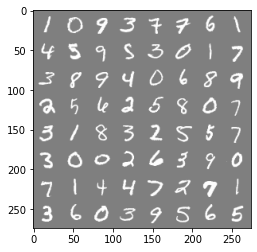

In [343]:
imshow(torchvision.utils.make_grid(images))

## Creating LeNet-5 Architecture

### Convolution Layer Pytorch Documentation

$$ Input: (N, C_{in}, H_{in}, W_{in}) $$

$$ Output: (N, C_{out}, H_{out}, W_{out}) $$

$$where,$$

$$H_{out} = \left\lfloor\frac{H_{in} + 2 \times \text{padding}[0] - \text{dilation}[0] \times (\text{kernel_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor$$

$$W_{out} = \left\lfloor\frac{W_{in} + 2 \times \text{padding}[1] - \text{dilation}[1] \times (\text{kernel_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor$$



#### Finding the kernel size and padding
- input : 32 * 32 image with channel 1 
- conv1 : 
    - in channel : 1
    - out channel : 6
    - output_size : 28 * 28
    - kernel size : 5 * 5
- conv2 :
    - in channel : 6
    - out channel : 16
    - output_size : 14 * 14
    - kernel size : 5 * 5
- conv3 :
    - in channel : 1
    - out channel : 6
    - output_size : 28 * 28
    - kernel size : 5 * 5
- avgpooling :
    - kernel size : 2 * 2

In [40]:
class LeNet_5(nn.Module):
    
    def __init__(self, num_channels=1, num_classes=10):
        super(LeNet_5, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(num_channels, out_channels=6, kernel_size=5)
        self.avgpool = nn.AvgPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)

        
    def forward(self,x):
        
#         print(x.shape)
        x = self.relu(self.conv1(x))
#         print(x.shape)
        x = self.avgpool(x)
#         print(x.shape)

        x = self.relu(self.conv2(x))
#         print(x.shape)

        x = self.avgpool(x)
#         print(x.shape)

        x = self.relu(self.conv3(x))
#         print(x.shape)

        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.fc1(x))
#         print(x.shape)

        x = self.fc2(x)
#         print(x.shape)

        return x

        

In [9]:
# x = torch.rand(1, 1, 32, 32)
# print(x.shape)
# print("initializing the model")
# print()
# model = LeNet_5()
# model(x)

torch.Size([1, 1, 32, 32])
initializing the model

torch.Size([1, 1, 32, 32])
torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 14, 14])
torch.Size([1, 16, 10, 10])
torch.Size([1, 16, 5, 5])
torch.Size([1, 120, 1, 1])
torch.Size([1, 84])
torch.Size([1, 10])


tensor([[-0.0890,  0.0574, -0.1394, -0.1267, -0.0262, -0.0276,  0.0527, -0.0608,
          0.1047,  0.0693]], grad_fn=<AddmmBackward>)

### Testing MSELoss

In [201]:
x, target = next(iter(test_loader))
# x_t.shape
print(x.shape)
print("initializing the model")
print()
model = LeNet_5()
y = model(x)

torch.Size([64, 1, 32, 32])
initializing the model



In [218]:
print(y.shape)
y.dtype

torch.Size([64, 10])


torch.float32

In [219]:
y.flatten().shape

torch.Size([640])

In [203]:
print(target.shape)
target.dtype

torch.Size([64])


torch.int64

In [204]:
f_target = target.float()
print(f_target.shape)
f_target.dtype

torch.Size([64])


torch.float32

In [205]:
f_target.unsqueeze(dim=1).shape

torch.Size([64, 1])

In [206]:
u_f_target = f_target.unsqueeze(dim=1)
u_f_target.dtype

torch.float32

In [207]:
loss_test = nn.MSELoss()
output_x = loss_test(y, u_f_target)
# output.item()
output_x.backward()

In [194]:
output_x.dtype

torch.float32

In [208]:
output_x

tensor(23.7532, grad_fn=<MseLossBackward>)

In [197]:
x, target = next(iter(test_loader))
# x_t.shape
print(x.shape)
print("initializing the model")
print()
model = LeNet_5()
y = model(x)

torch.Size([64, 1, 32, 32])
initializing the model



### Testing CrossEntropyLoss()

In [198]:
new_loss = nn.CrossEntropyLoss()
output_n = new_loss(y, target)
# output.item()
output_n.backward()

In [199]:
output_n

tensor(2.2922, grad_fn=<NllLossBackward>)

## Initialize the model

In [220]:
lenet5_model = LeNet_5(num_channels=1, num_classes=10).to(device)

## Defining Criterion and Optimizer

In [221]:
lr = 0.02  # learning rate

In [222]:
criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss(reduction='mean') #nn.MSELoss()

optimizer = optim.SGD(lenet5_model.parameters(), lr=lr)

### Defining the accuracy in a batch for the model

In [238]:
def accuracy_batch(x_test, y_test, model,cuda=True):
    n_correct = 0
    n_total = 0
    model.eval()
    
    with torch.no_grad():
        if cuda:
            x_test = x_test.to(device)
            y_test = y_test.to(device=device)
#         x_test = x_test.float()/255

        preds = model(x_test)
        _, preds_idx = preds.max(1)
        n_correct += (preds_idx==y_test).sum().item()
        n_total += x_test.size(0)
        
    model.train()

#     print(f"Out of {n_total} images {n_correct} where correctly classified")
    acc = (n_correct/n_total) * 100
#     print(f"Accuracy of the model is {acc:.2f}") 
    return acc, preds_idx

## Training the lenet-5 in MNIST Data

In [214]:
from tqdm import tqdm  # for progress bar

In [223]:
num_epochs = 5

In [224]:
for epoch in range(num_epochs):
    losses = []
    loop = tqdm(enumerate(train_loader), total=len(train_loader), leave=True)
    for batch_idx, (x_train, y_train) in loop:
        x_train = x_train.to(device)
        y_train = y_train.to(device)
#         x_train = x_train.float()/255
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        output = lenet5_model(x_train) # shape: batch * num_classes
        
#         y_pred, index = output.max(dim=1)  # take the max value ,shape=batch
#         f_target = y_train.float()
#         u_f_target = f_target.unsqueeze(dim=1)
        
#         loss = criterion(output, u_f_target)
        loss = criterion(output, y_train)

#         loss = loss.float()
        losses.append(loss.item())
        
        loss.backward()
        
        optimizer.step()
        
        if batch_idx%15 == 0:
            accuracy, _ = accuracy_batch(x_train, y_train, lenet5_model, cuda=True)
        
        loop.set_description(f"Epoch [{epoch}/{num_epochs}]")
        loop.set_postfix(loss=loss.item(), acc=accuracy)
#     print(f" loss at the end of {epoch} epoch is {loss}")

print("training done")

Epoch [4/5]: 100%|██████████| 938/938 [00:10<00:00, 86.51it/s, acc=100, loss=0.252]  

training done


## Accuracy in the test loader 

In [116]:
def accuracy_loader(test_loader, model,cuda=True):
    n_correct = 0
    n_total = 0
    model.eval()
    with torch.no_grad():
        for x_test, y_test in test_loader:
            if cuda:
                x_test = x_test.to(device)
                y_test = y_test.to(device=device)
#             x_test = x_test.float()/255
            preds = model(x_test)
            _, preds_idx = preds.max(1)
            n_correct += (preds_idx==y_test).sum().item()
            n_total += x_test.size(0)
    model.train()

    print(f"Out of {n_total} images {n_correct} where correctly classified")
    acc = (n_correct/n_total) * 100
    print(f"Accuracy of the model is {acc:.2f}") 
#     return accc

In [225]:
accuracy_loader(test_loader, lenet5_model,cuda=True)

Out of 10000 images 9561 where correctly classified
Accuracy of the model is 95.61


##  Show input and the predictions made by the model

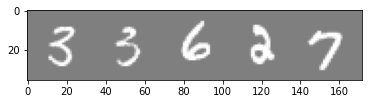

Actual
       3        3        6        2        7
Predictions
       3        5        6        2        7


In [340]:
# get some random training images
images, labels = next(iter(test_loader))

f_images = images[:5]
f_labels = labels[:5]

# show images
imshow(torchvision.utils.make_grid(f_images))

# print labels
print("Actual")
print(' '.join('%8s' % classes[l.item()] for l in f_labels)) #for j in range(4)))
            
_, preds = accuracy_batch(images[:5], labels[:5], lenet5_model, cuda=True)

print("Predictions")
print(' '.join('%8s' % classes[pred_idx] for pred_idx in preds))
